## TC 5033
### Word Embeddings

<br>

#### Activity 3a: Exploring Word Embeddings with GloVe and Numpy
<br>


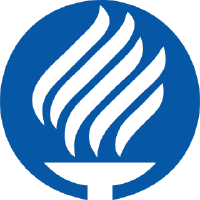

## TEAM 33
| ID          | Name                          |
|-------------|-------------------------------|
| A01794956   | Luis Oporto                   |
| A00915255   | Ernesto Zapata                |
| A01065270   | José Manuel Romo Peredo       |
| A01795483   | Nicolás Araque                |
| A01794892   | Eduardo Rodriguez Ramirez     |

- Objective:
    - To understand the concept of word embeddings and their significance in Natural Language Processing.
    - To learn how to manipulate and visualize high-dimensional data using dimensionality reduction techniques like PCA and t-SNE.
    - To gain hands-on experience in implementing word similarity and analogies using GloVe embeddings and Numpy.
    
<br>

- Instructions:
    - Download GloVe pre-trained vectors from the provided link in Canvas, the official public project: 
    Jeffrey Pennington, Richard Socher, and Christopher D. Manning. 2014. GloVe: Global Vectors for Word Representation
    https://nlp.stanford.edu/data/glove.6B.zip

    - Create a dictorionay of the embeddings so that you carry out fast look ups. Save that dictionary e.g. as a serialized file for faster loading in future uses.
    
    - PCA and t-SNE Visualization: After loading the GloVe embeddings, use Numpy and Sklearn to perform PCA and t-SNE to reduce the dimensionality of the embeddings and visualize them in a 2D or 3D space.

    - Word Similarity: Implement a function that takes a word as input and returns the 'n' most similar words based on their embeddings. You should use Numpy to implement this function, using libraries that already implement this function (e.g. Gensim) will result in zero points.

    - Word Analogies: Implement a function to solve analogies between words. For example, "man is to king as woman is to ____". You should use Numpy to implement this function, using libraries that already implement this function (e.g. Gensim) will result in zero points.

    - Submission: This activity is to be submitted in teams of 3 or 4. Only one person should submit the final work, with the full names of all team members included in a markdown cell at the beginning of the notebook.
    
<br>

- Evaluation Criteria:

    - Code Quality (40%): Your code should be well-organized, clearly commented, and easy to follow. Use also markdown cells for clarity.
    
   - Functionality (60%): All functions should work as intended, without errors.
       - Visualization of PCA and t-SNE (10% each for a total of 20%)
       - Similarity function (20%)
       - Analogy function (20%)
|



#### Import libraries

In [304]:
# Import libraries
import torch
import torch.nn.functional as F
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
import pickle
plt.style.use('ggplot')

#### Load file

In [305]:
# PATH = '/media/pepe/DataUbuntu/Databases/glove_embeddings/glove.6B.200d.txt'
PATH = './data/glove.6B.50d.txt'
emb_dim = 50

In [306]:
# Create dictionary with embeddings
def create_emb_dictionary(path):
    embeddings_dict = {}
    with open(path, 'r', encoding='utf-8') as file:
        for line in file:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings_dict[word] = vector
    return embeddings_dict

In [307]:
# create dictionary
embeddings_dict = create_emb_dictionary(PATH)

In [308]:
# Serialize
with open('./data/embeddings_dict_50D.pkl', 'wb') as f:
    pickle.dump(embeddings_dict, f)

# Deserialize
# with open('embeddings_dict_200D.pkl', 'rb') as f:
#     embeddings_dict = pickle.load(f)

#### See some embeddings

In [309]:
# Show some
def show_n_first_words(path, n_words):
        with open(path, 'r') as f:
            for i, line in enumerate(f):
                print(line.split(), len(line.split()[1:]))
                if i>=n_words: break

In [310]:
show_n_first_words(PATH, 5)

['the', '0.418', '0.24968', '-0.41242', '0.1217', '0.34527', '-0.044457', '-0.49688', '-0.17862', '-0.00066023', '-0.6566', '0.27843', '-0.14767', '-0.55677', '0.14658', '-0.0095095', '0.011658', '0.10204', '-0.12792', '-0.8443', '-0.12181', '-0.016801', '-0.33279', '-0.1552', '-0.23131', '-0.19181', '-1.8823', '-0.76746', '0.099051', '-0.42125', '-0.19526', '4.0071', '-0.18594', '-0.52287', '-0.31681', '0.00059213', '0.0074449', '0.17778', '-0.15897', '0.012041', '-0.054223', '-0.29871', '-0.15749', '-0.34758', '-0.045637', '-0.44251', '0.18785', '0.0027849', '-0.18411', '-0.11514', '-0.78581'] 50
[',', '0.013441', '0.23682', '-0.16899', '0.40951', '0.63812', '0.47709', '-0.42852', '-0.55641', '-0.364', '-0.23938', '0.13001', '-0.063734', '-0.39575', '-0.48162', '0.23291', '0.090201', '-0.13324', '0.078639', '-0.41634', '-0.15428', '0.10068', '0.48891', '0.31226', '-0.1252', '-0.037512', '-1.5179', '0.12612', '-0.02442', '-0.042961', '-0.28351', '3.5416', '-0.11956', '-0.014533', '-0.

### Plot some embeddings

In [311]:
def plot_embeddings(emb_path, words2show, emb_dim, embeddings_dict, func=PCA, n_components=2):
    if not embeddings_dict:
        embeddings_dict = create_emb_dictionary(emb_path)
    
    selected_embeddings = []
    selected_words = []
    for word in words2show:
        if word in embeddings_dict:
            selected_embeddings.append(embeddings_dict[word])
            selected_words.append(word)
        else:
            print(f"Warning: '{word}' not found in embeddings dictionary.")

    selected_embeddings = np.array(selected_embeddings)
    
    if func == PCA:
        reducer = PCA(n_components=n_components)
    elif func == TSNE:
        reducer = TSNE(n_components=n_components, random_state=42)
    else:
        raise ValueError("Invalid function. Use PCA or TSNE.")

    reduced_embeddings = reducer.fit_transform(selected_embeddings)

    # Assign colors based on quadrants for 2D or 3D
    colors = []
    if n_components == 2:
        for emb in reduced_embeddings:
            x, y = emb
            if x >= 0 and y >= 0:
                colors.append('red')
            elif x < 0 and y >= 0:
                colors.append('blue')
            elif x >= 0 and y < 0:
                colors.append('green')
            else:
                colors.append('purple')

    elif n_components == 3:
        for emb in reduced_embeddings:
            x, y, z = emb
            if x >= 0 and y >= 0 and z >= 0:
                colors.append('red')
            elif x < 0 and y >= 0 and z >= 0:
                colors.append('blue')
            elif x >= 0 and y < 0 and z >= 0:
                colors.append('green')
            elif x >= 0 and y >= 0 and z < 0:
                colors.append('purple')
            elif x < 0 and y < 0 and z >= 0:
                colors.append('orange')
            elif x < 0 and y >= 0 and z < 0:
                colors.append('cyan')
            elif x >= 0 and y < 0 and z < 0:
                colors.append('magenta')
            else:
                colors.append('yellow')

    # Plotting
    if n_components == 2:
        plt.figure(figsize=(12, 8))
        for i, word in enumerate(selected_words):
            plt.scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1], color=colors[i])
            plt.text(reduced_embeddings[i, 0], reduced_embeddings[i, 1], word)

        plt.xlabel("Component 1")
        plt.ylabel("Component 2")
        plt.title(f"2D visualization of word embeddings using {func.__name__}")
        plt.grid(True)
        plt.show()

    elif n_components == 3:
        fig = plt.figure(figsize=(12, 8))
        ax = fig.add_subplot(111, projection='3d')
        

        for i, word in enumerate(selected_words):
            x, y, z = reduced_embeddings[i]
            
            ax.scatter(x, y, z, color=colors[i], s=50)
            ax.text(x, y, z, word, fontsize=9)

        
        ax.set_xlabel('Component 1', fontweight='bold')
        ax.set_ylabel('Component 2', fontweight='bold')
        ax.set_zlabel('Component 3', fontweight='bold')
        plt.title(f"3D visualization of word embeddings using {func.__name__}")
        plt.show()

In [312]:
words= ['burger', 'tortilla', 'bread', 'pizza', 'beef', 'steak', 'fries', 'chips', 
            'argentina', 'mexico', 'spain', 'usa', 'france', 'italy', 'greece', 'china',
            'water', 'beer', 'tequila', 'wine', 'whisky', 'brandy', 'vodka', 'coffee', 'tea',
            'apple', 'banana', 'orange', 'lemon', 'grapefruit', 'grape', 'strawberry', 'raspberry',
            'school', 'work', 'university', 'highschool']


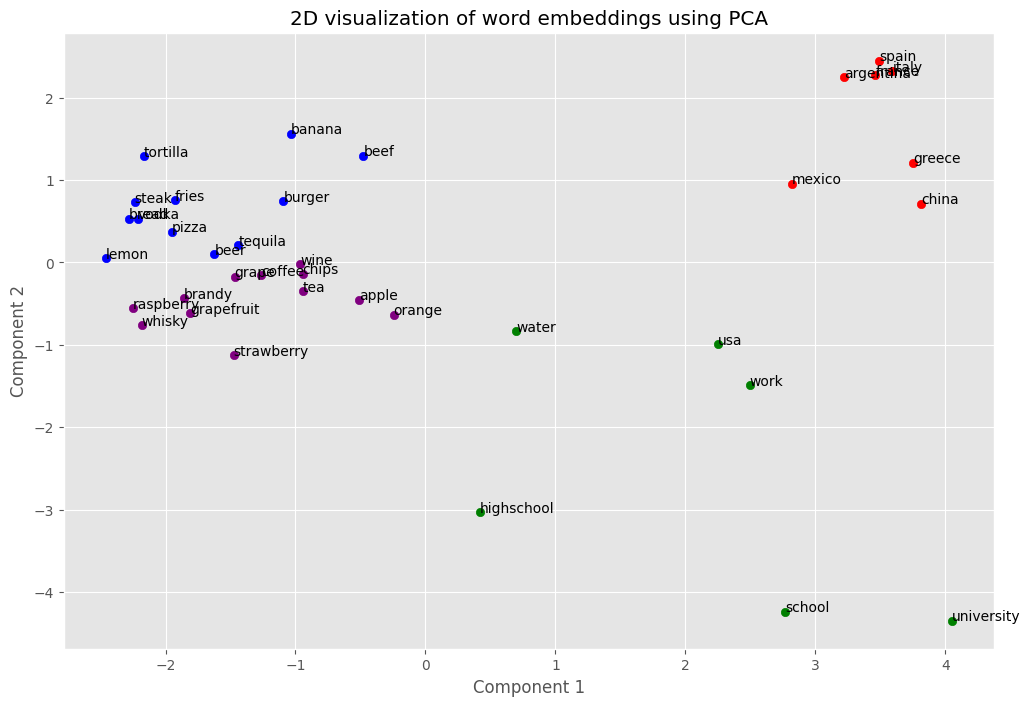

In [313]:
plot_embeddings(PATH, words, emb_dim, embeddings_dict, PCA)

**This plot shows how how this words can be clustered after PCA using 2 dimensions:**

- Food: Words like "burger," "tortilla," and "pizza" cluster in the lower-left quadrant, indicating their shared context. "Beef" and "steak" are particularly close, reflecting their similarity as meat items.
- Countries: Cluster on the right, with "France," "Italy," and "Spain" grouped closely, possibly due to cultural ties. "China" appears slightly apart, likely due to cultural and linguistic differences.

- Drinks: Alcoholic drinks (e.g., "beer," "whisky," "vodka") form a distinct cluster, while "coffee" and "tea" are near each other as popular non-alcoholic beverages. "Water" is slightly isolated.

- Fruits: "Strawberry" and "raspberry" are close, reflecting their berry category. "Apple," "orange," and "banana" are more spread out, possibly due to varying contextual uses.

- Institutions: Words like "school" and "university" cluster distinctly in the top-right, indicating strong separation from other categories.

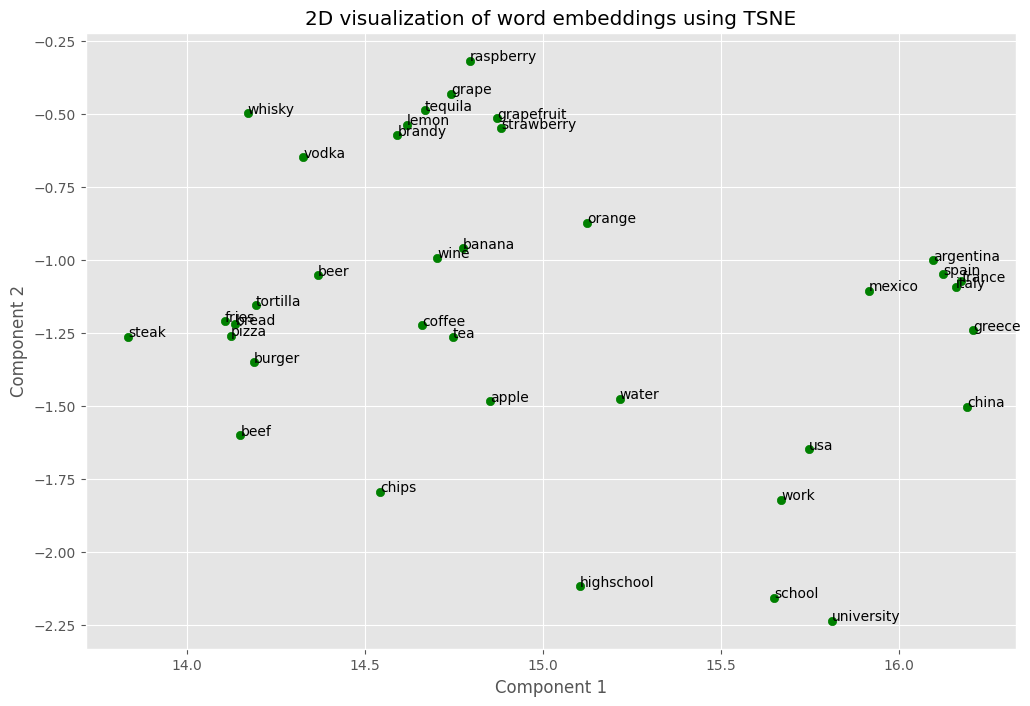

In [314]:
# t-SNE dimensionality reduction for visualization
embeddings = plot_embeddings(PATH, words, emb_dim, embeddings_dict, TSNE)

##

After TSNE we can observe similar clustering as with PCA but with slight differences:

- Food: "Burger," "tortilla," "bread," and "pizza" form a tight cluster, showing a shared context. "Beef" and "steak" are also nearby, while "chips" is slightly separate, suggesting distinct associations.

- Countries: While "Argentina," "Mexico," and "Spain" are close together, likely due to cultural or regional ties. "China" is slightly isolated from other countries, possibly due to linguistic or cultural differences.

- Drinks: Alcoholic drinks (e.g., "beer," "whisky," "vodka") are grouped closely showing their similarity. "Water" is positioned away from alcoholic beverages, while "coffee" and "tea" are also in a separate but nearby area, possibly reflecting non-alcoholic associations.

- Fruits: "Strawberry" and "raspberry" are close near, indicating their similarity as berries while "Apple," "banana," and "orange" are spread out, possibly reflecting diverse contexts.

- Institutions: Words like "school," "university," and "work" form a distinct cluster separated from other categories as in PCA.


In general TSNE offers clearer, denser clusters, revealing deeper associations, specially within categories such as beverages or countries.

### 3D Plots

We experimented with adding a 3rd dimmension (3rd principal component) to assess better interpretability.

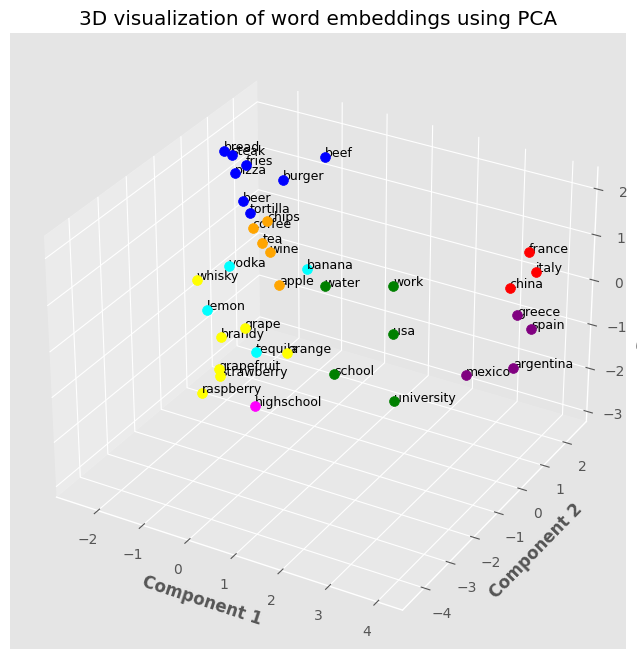

In [315]:
embeddings = plot_embeddings(PATH, words, emb_dim, embeddings_dict, PCA, 3)

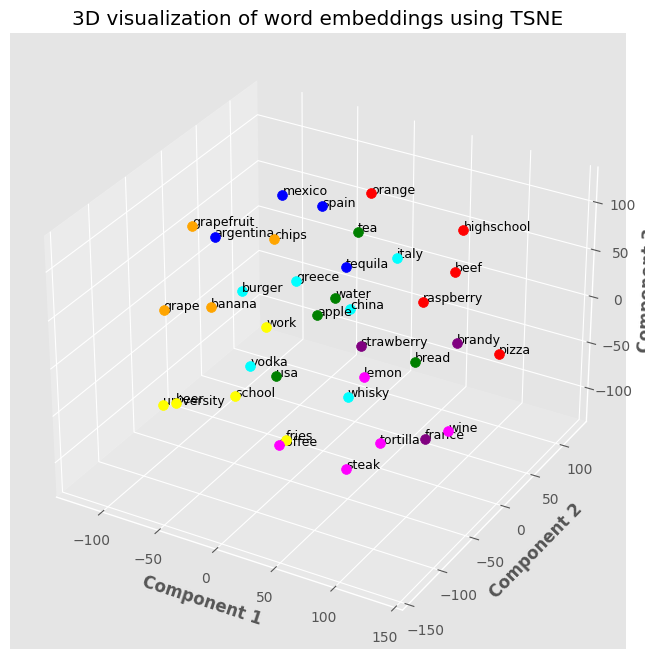

In [316]:
embeddings = plot_embeddings(PATH, words, emb_dim, embeddings_dict, TSNE, 3)

Adding a 3rd dimmension did not result in better interpretability for TSNE as is hard to visualy group the embeddings, this is not the case for PCA where adding the 3rd dimmension gives a better idea of similarity, for example the countries, is greater the similarity between Mexico and Argentina or France and Italy in comparisson with the others this relationship was not that clear with 2 PCA.

### Let us compute analogies

In [317]:
# analogy
def analogy(word1, word2, word3, embeddings_dict):

    if word1 not in embeddings_dict or word2 not in embeddings_dict or word3 not in embeddings_dict:
        return "One or more words not found in embeddings dictionary."

    analogy_vector = embeddings_dict[word2] - embeddings_dict[word1] + embeddings_dict[word3]

    best_word = None
    max_similarity = -np.inf

    for word, vector in embeddings_dict.items():
        if word in [word1, word2, word3]:
            continue

        similarity = np.dot(analogy_vector, vector) / (np.linalg.norm(analogy_vector) * np.linalg.norm(vector))
        
        if similarity > max_similarity:
            max_similarity = similarity
            best_word = word

    return best_word

In [318]:
analogy('man', 'king', 'woman', embeddings_dict)

'queen'

In [319]:
# most similar
def find_most_similar(word, embeddings_dict, top_n=10):
    if word not in embeddings_dict:
        return f"'{word}' not found in embeddings dictionary."

    word_vector = embeddings_dict[word]

    similarities = {}
    for other_word, other_vector in embeddings_dict.items():
        if other_word == word:
            continue

        #We implement cosine similarity.
        similarity = np.dot(word_vector, other_vector) / (np.linalg.norm(word_vector) * np.linalg.norm(other_vector))
        similarities[other_word] = similarity

    most_similar = sorted(similarities.items(), key=lambda x: x[1], reverse=True)[:top_n]
    
    return most_similar

In [320]:
most_similar = find_most_similar('mexico', embeddings_dict)

In [321]:
for i, w in enumerate(most_similar, 1):
    print(f'{i} ---> {w[0]}')

1 ---> mexican
2 ---> venezuela
3 ---> colombia
4 ---> peru
5 ---> chile
6 ---> puerto
7 ---> rico
8 ---> cuba
9 ---> guatemala
10 ---> panama


### Conclusion

We explored word embeddings using GloVe vectors and applied dimensionality reduction techniques PCA and TSNE to visualize high-dimensional data in a 2D space. By analyzing various categories like food, countries, drinks, fruits, and institutions, we observed how GloVe embeddings capture semantic relationships between words.

PCA Analysis: PCA provided an initial view of the embeddings. While it grouped words into general categories. It offered a broader but less detailed clustering of related terms as the later obtained with TSNE.

TSNE Analysis: Provided a more refined visualization, with tighter, clearer clusters that preserved local relationships better than PCA. It effectively highlighted semantic similarities within categories, making it easier to distinguish closely related items, such as alcoholic drinks or specific fruits, and isolated distinct groups like institutional words.

In addition we created functions to calculate word similarity and solve word analogies by comparing its vectors, showing the power of word embeddings in capturing linguistic relationships and producing meaningful results.